# NPPC historical phenotypic barley data analysis

## Load packages, custom functions and data

In [1]:
library(readxl)
library(tidyverse)
library(multtest)
library(asreml)

source("../custom_functions.r")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
  

Online License checked out Fri Apr 12 14:46:31 2024


In [2]:
data_total_winter <- preprocess("Historic_Barley_W_NPPC.xlsx")
write_csv(data_total_winter, "NPPC_winter_barley.csv")
genotypes_w <- distinct(data_total_winter["accenumb"]) |> rename("genotype" = "accenumb")
cat("Winter Barley:\n", nrow(data_total_winter), "observations\n", nrow(genotypes_w), "genotypes\n", nrow(distinct(data_total_winter["campaign"])), "campaigns\n\n")
summary(data_total_winter[c("days_to_heading", "plant_height", "thousand_kernel_weight")])

Winter Barley:
 1452 observations
 520 genotypes
 22 campaigns



 days_to_heading  plant_height    thousand_kernel_weight
 Min.   : 75.0   Min.   : 17.10   Min.   :29.55         
 1st Qu.:217.0   1st Qu.: 86.88   1st Qu.:43.60         
 Median :222.0   Median : 93.60   Median :48.00         
 Mean   :221.7   Mean   : 91.85   Mean   :48.60         
 3rd Qu.:227.0   3rd Qu.: 99.00   3rd Qu.:53.90         
 Max.   :237.0   Max.   :131.20   Max.   :65.60         
 NA's   :437     NA's   :60       NA's   :105           

In [3]:
data_total_spring <- preprocess("Historic_Barley_S_NPPC.xlsx")
write_csv(data_total_spring, "NPPC_spring_barley.csv")
genotypes_s <- distinct(data_total_spring["accenumb"]) |> rename("genotype" = "accenumb")
cat("Spring Barley:\n", nrow(data_total_spring), "observations\n", nrow(genotypes_s), "genotypes\n", nrow(distinct(data_total_spring["campaign"])), "campaigns\n\n")
summary(data_total_spring[c("days_to_heading", "plant_height", "thousand_kernel_weight")])

Spring Barley:
 2254 observations
 1053 genotypes
 33 campaigns



 days_to_heading   plant_height    thousand_kernel_weight
 Min.   : 38.00   Min.   :  6.48   Min.   : 3.60         
 1st Qu.: 70.00   1st Qu.: 71.33   1st Qu.:40.00         
 Median : 78.00   Median : 77.42   Median :44.00         
 Mean   : 77.41   Mean   : 78.86   Mean   :43.09         
 3rd Qu.: 86.00   3rd Qu.: 86.00   3rd Qu.:48.23         
 Max.   :104.00   Max.   :120.33   Max.   :66.00         
 NA's   :1384     NA's   :242      NA's   :501           

## Subset data, remove missing values and singletons, make factors

In [4]:
cat("Winter:\n")
data_sub_WB_HT <- data_total_winter |> make_data_sub("days_to_heading")
data_sub_WB_PH <- data_total_winter |> make_data_sub("plant_height")
data_sub_WB_TKW <- data_total_winter |> make_data_sub("thousand_kernel_weight")

Winter:
568 days_to_heading rows kept
1041 plant_height rows kept
1010 thousand_kernel_weight rows kept


In [5]:
cat("Spring:\n")
data_sub_SB_HT <- data_total_spring |> make_data_sub("days_to_heading")
data_sub_SB_PH <- data_total_spring |> make_data_sub("plant_height")
data_sub_SB_TKW <- data_total_spring |> make_data_sub("thousand_kernel_weight")

Spring:
523 days_to_heading rows kept
1409 plant_height rows kept
1293 thousand_kernel_weight rows kept


## Visualise trait values 

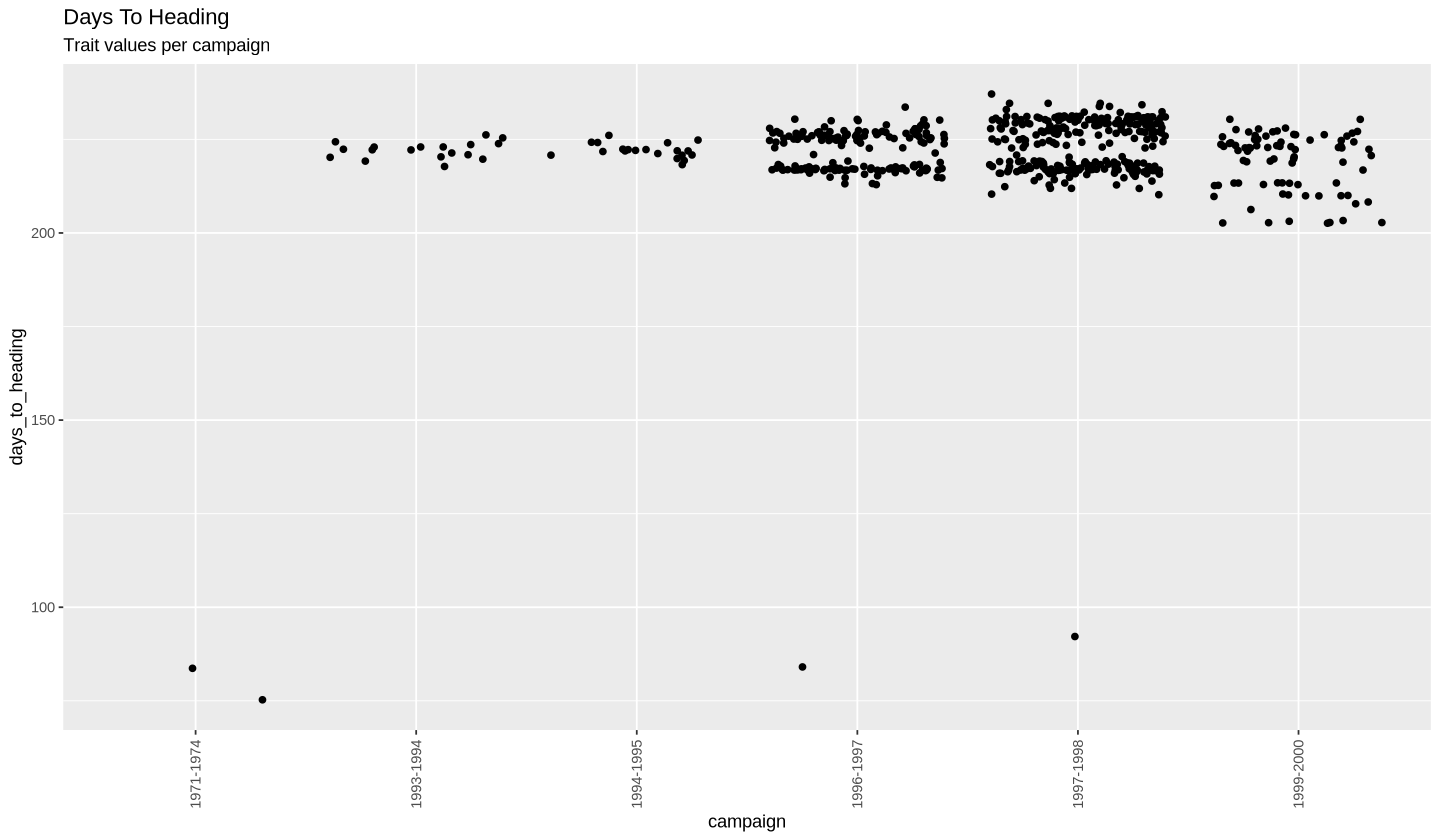

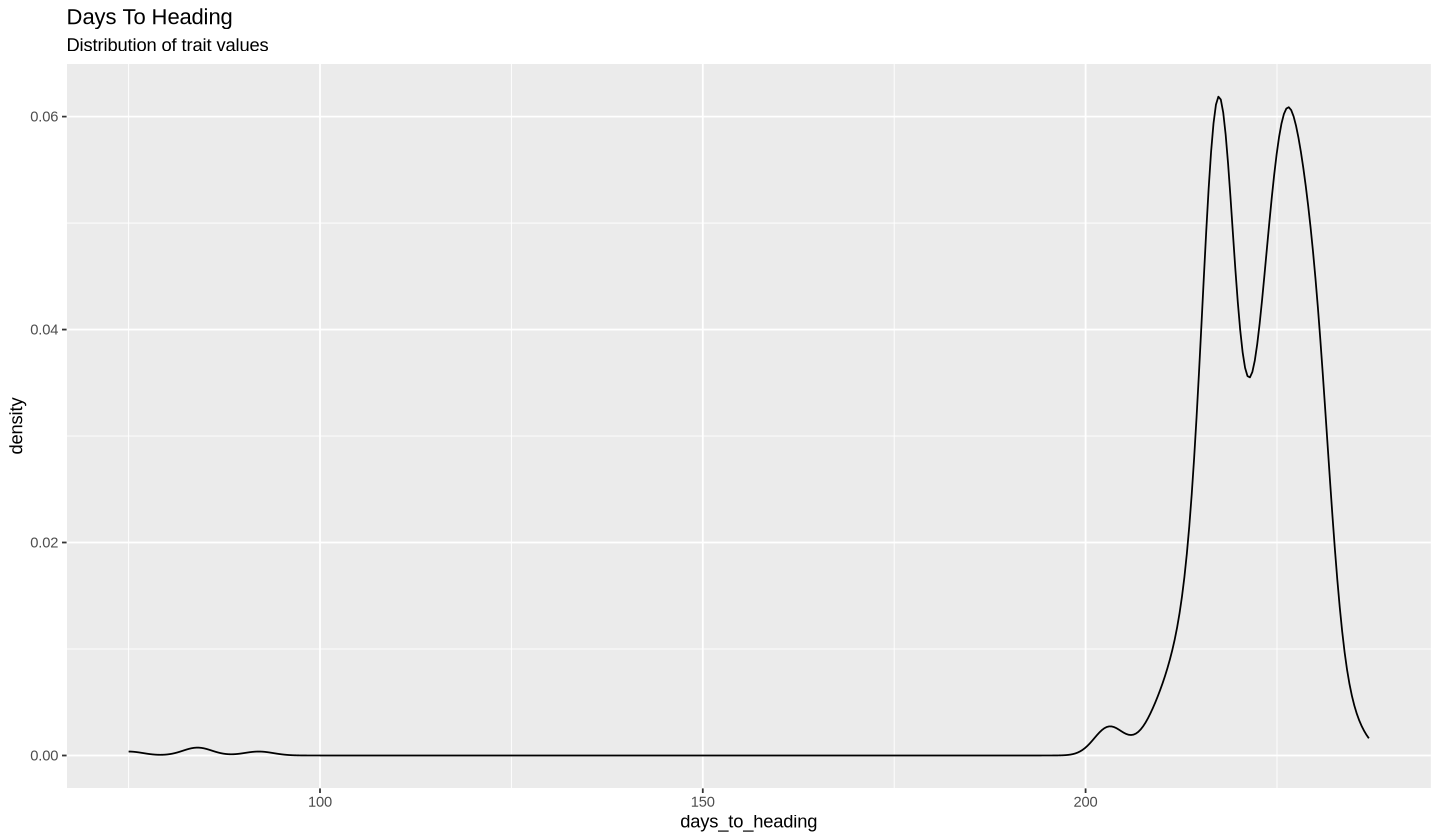

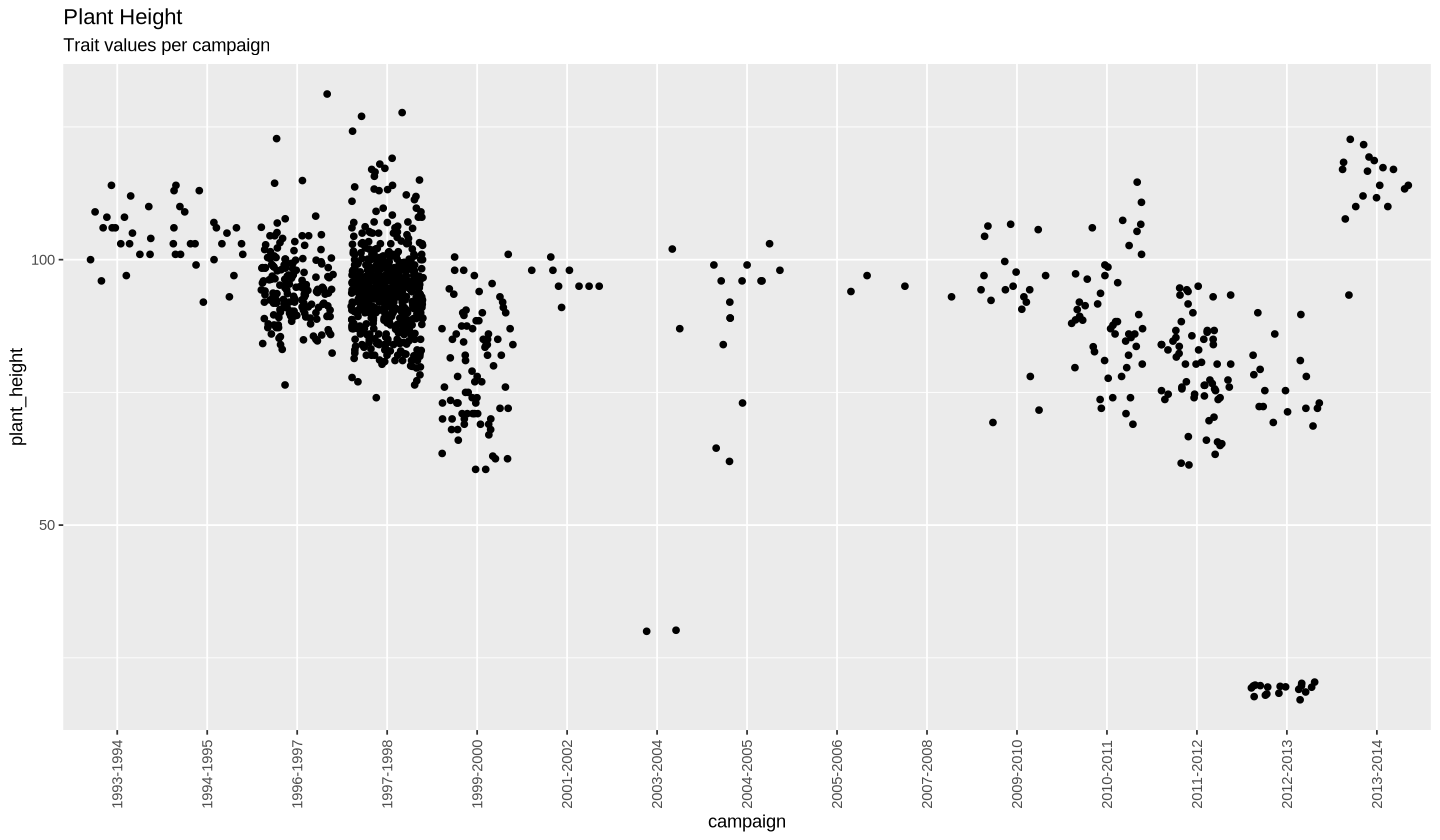

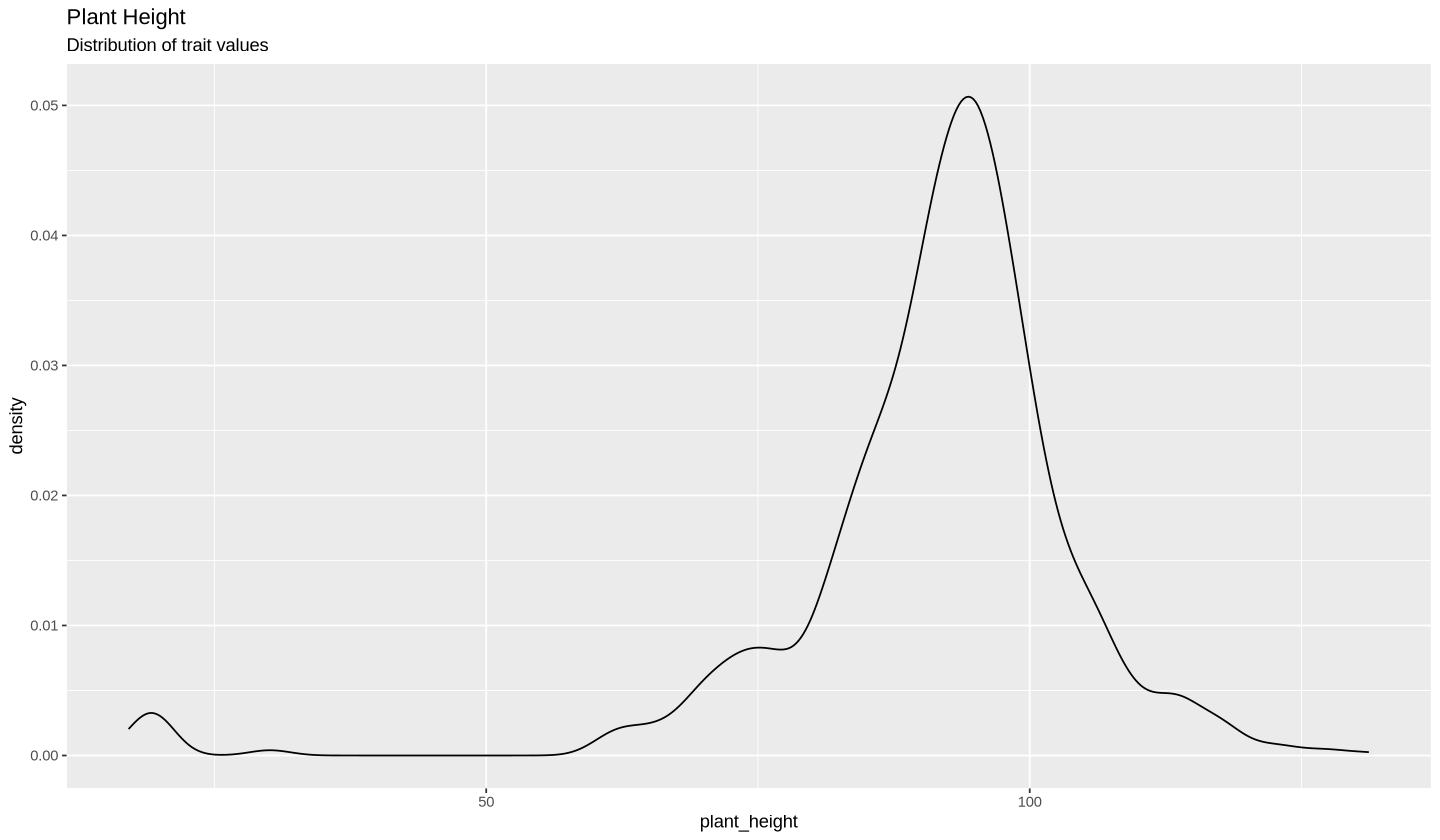

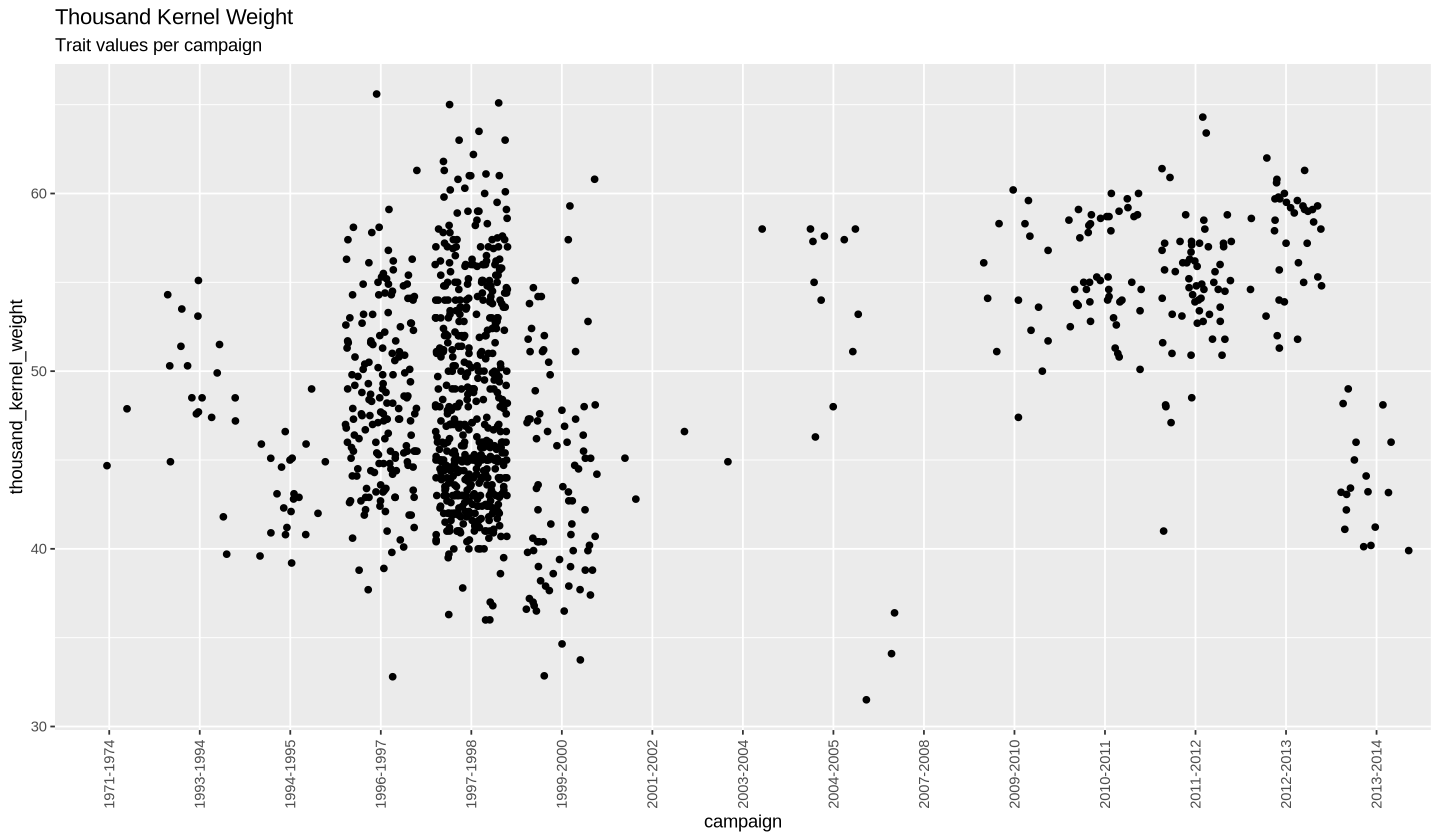

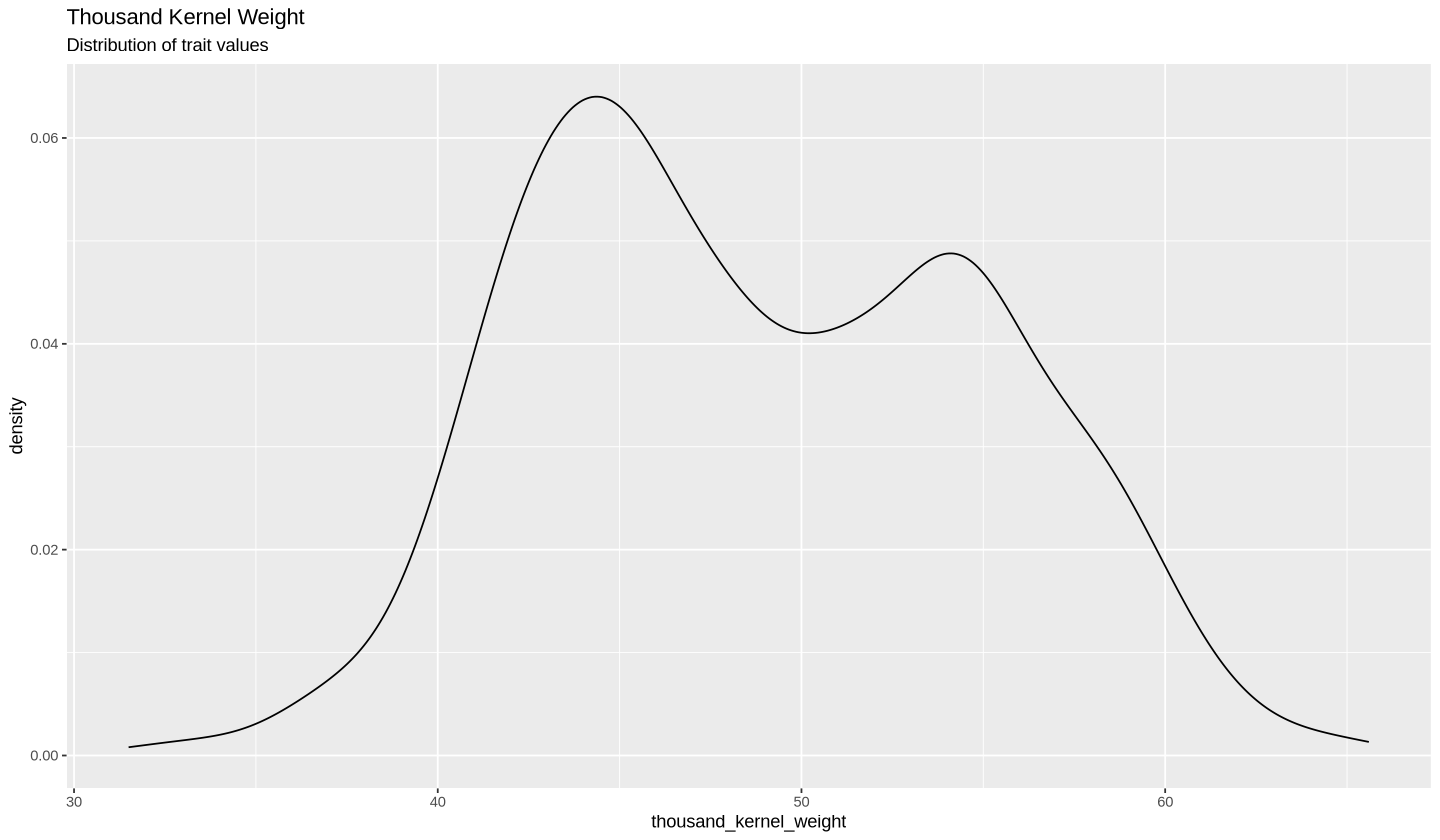

In [6]:
options(repr.plot.width=12, repr.plot.height=7)
data_sub_WB_HT |> visualise_trait(geom_density())
data_sub_WB_PH |> visualise_trait(geom_density())
data_sub_WB_TKW |> visualise_trait(geom_density())

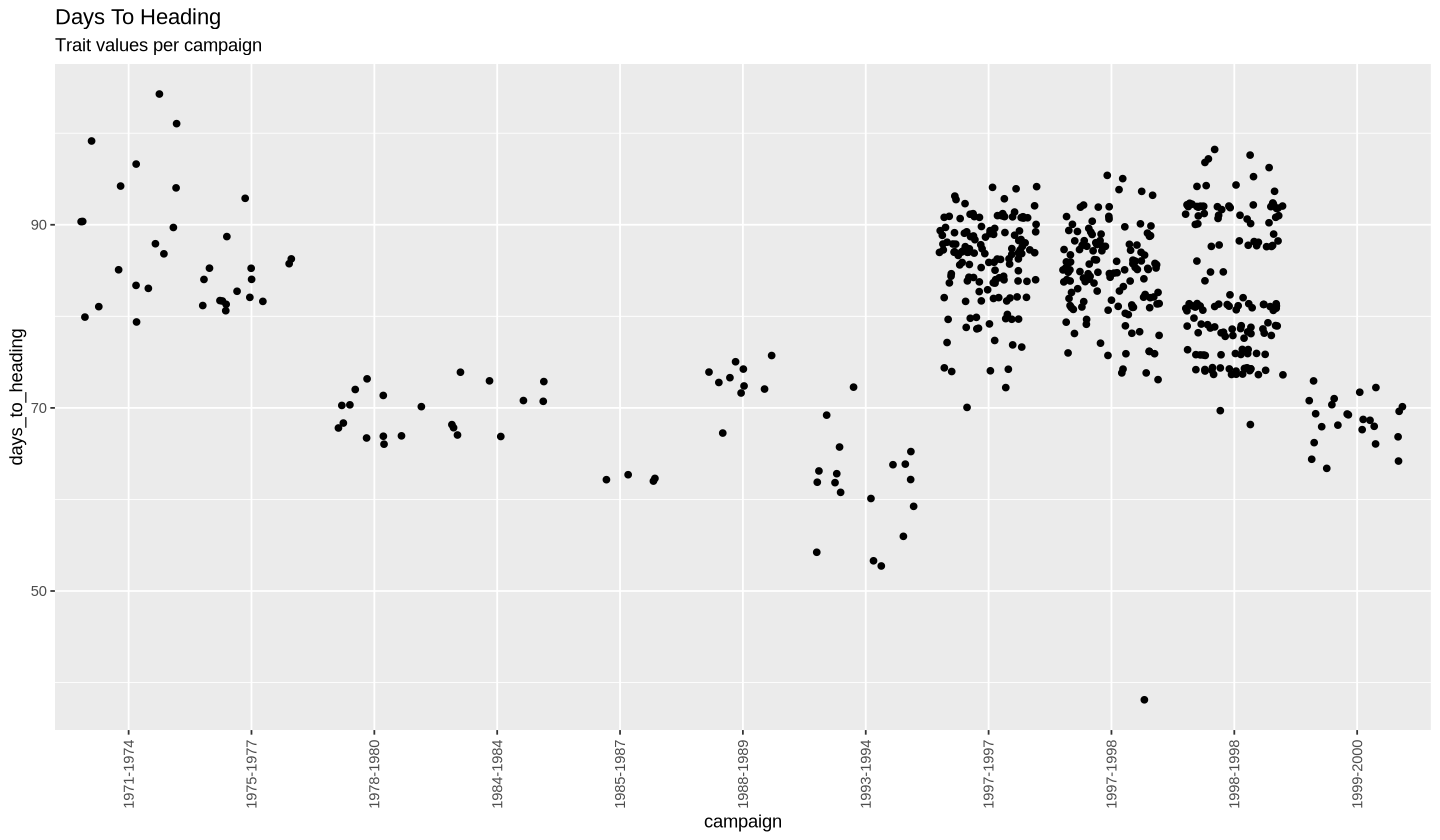

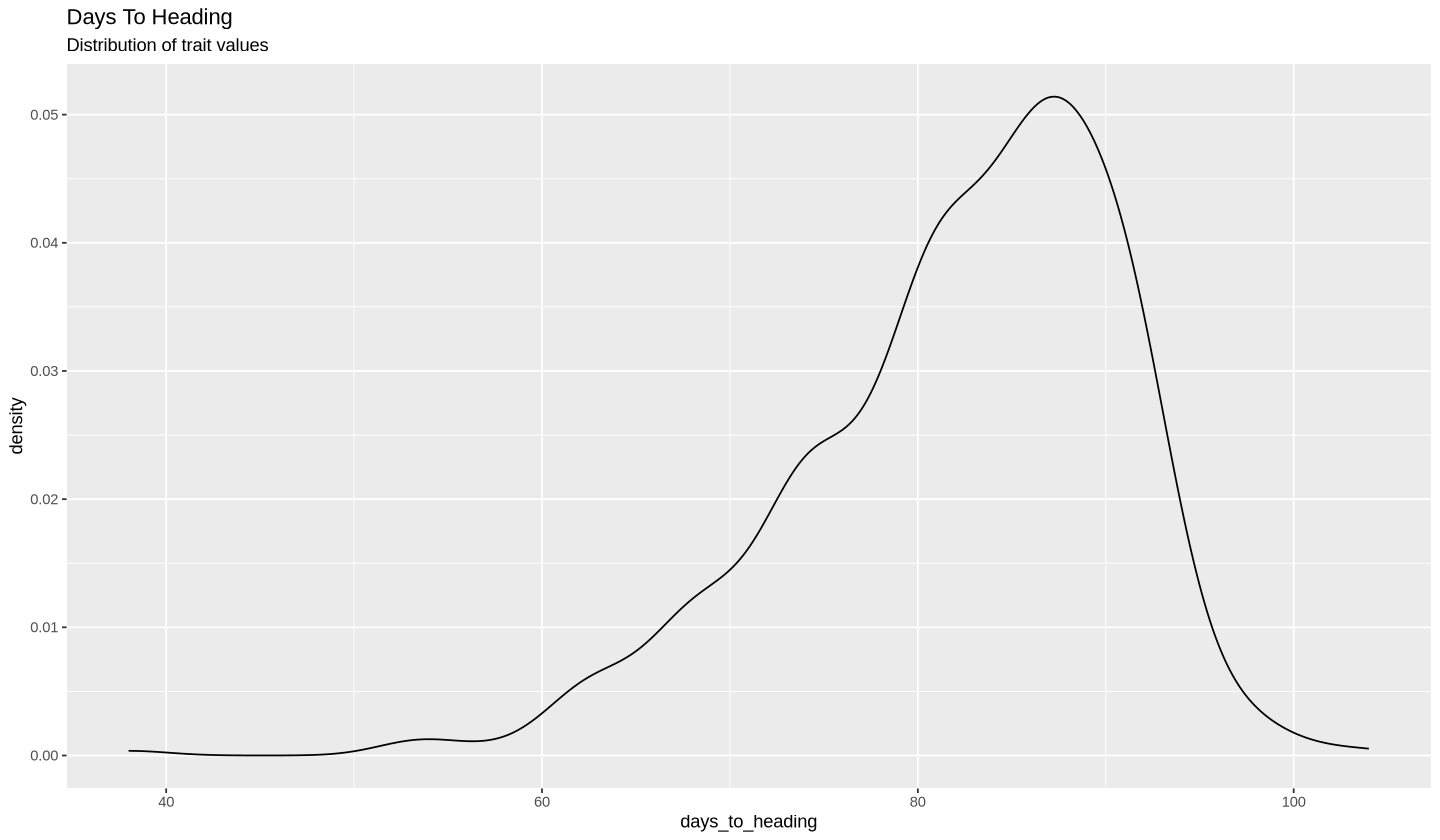

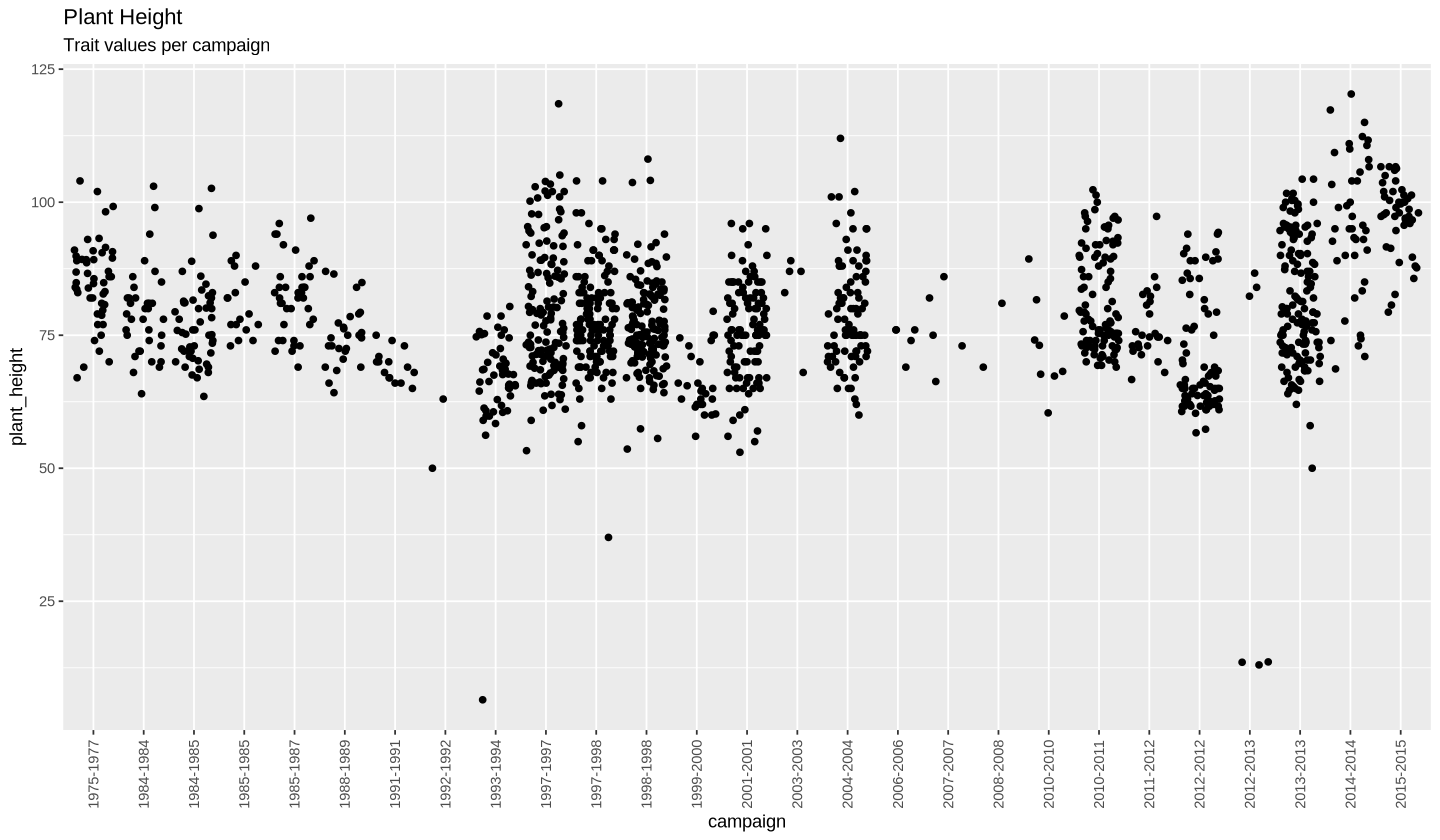

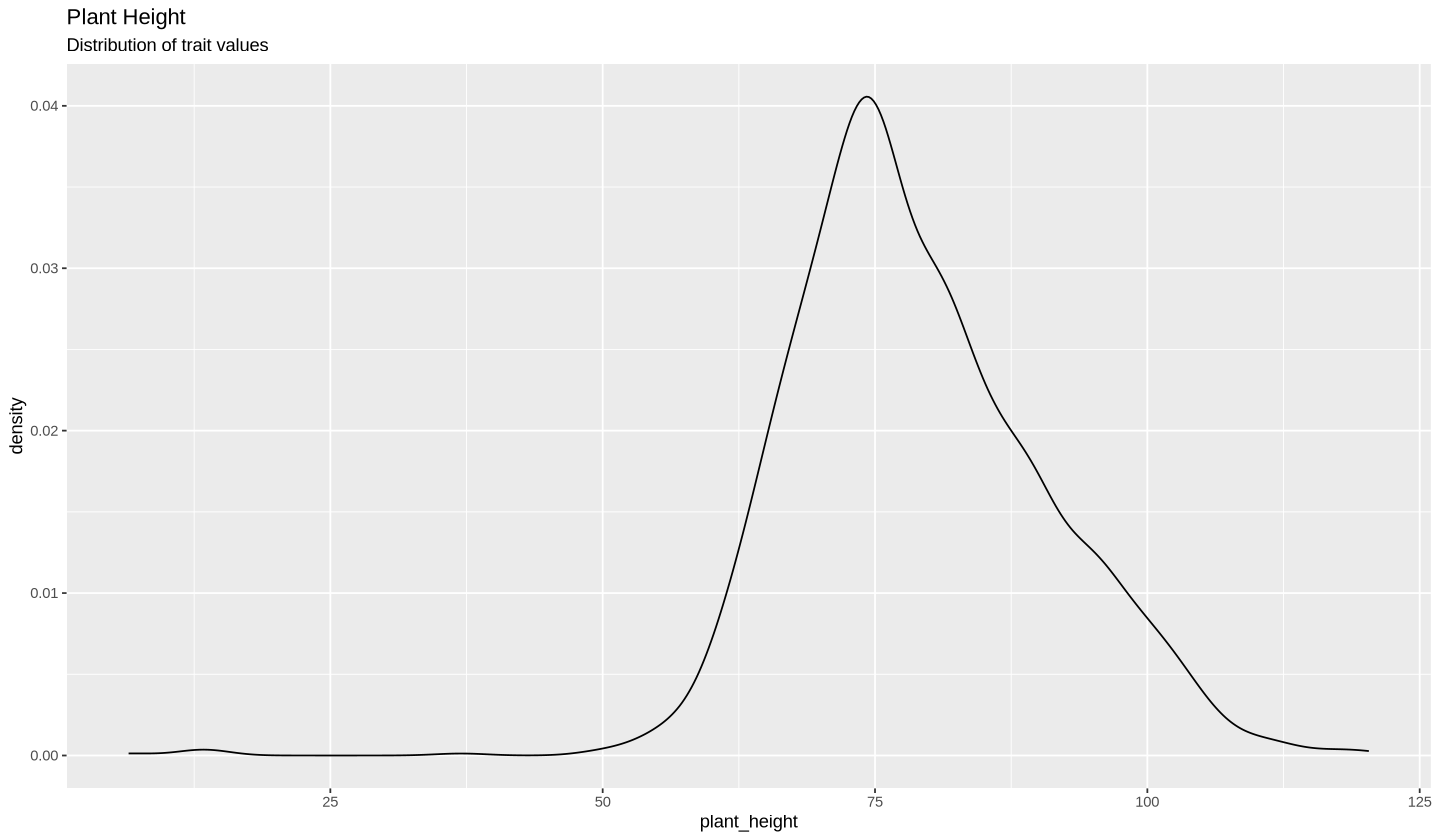

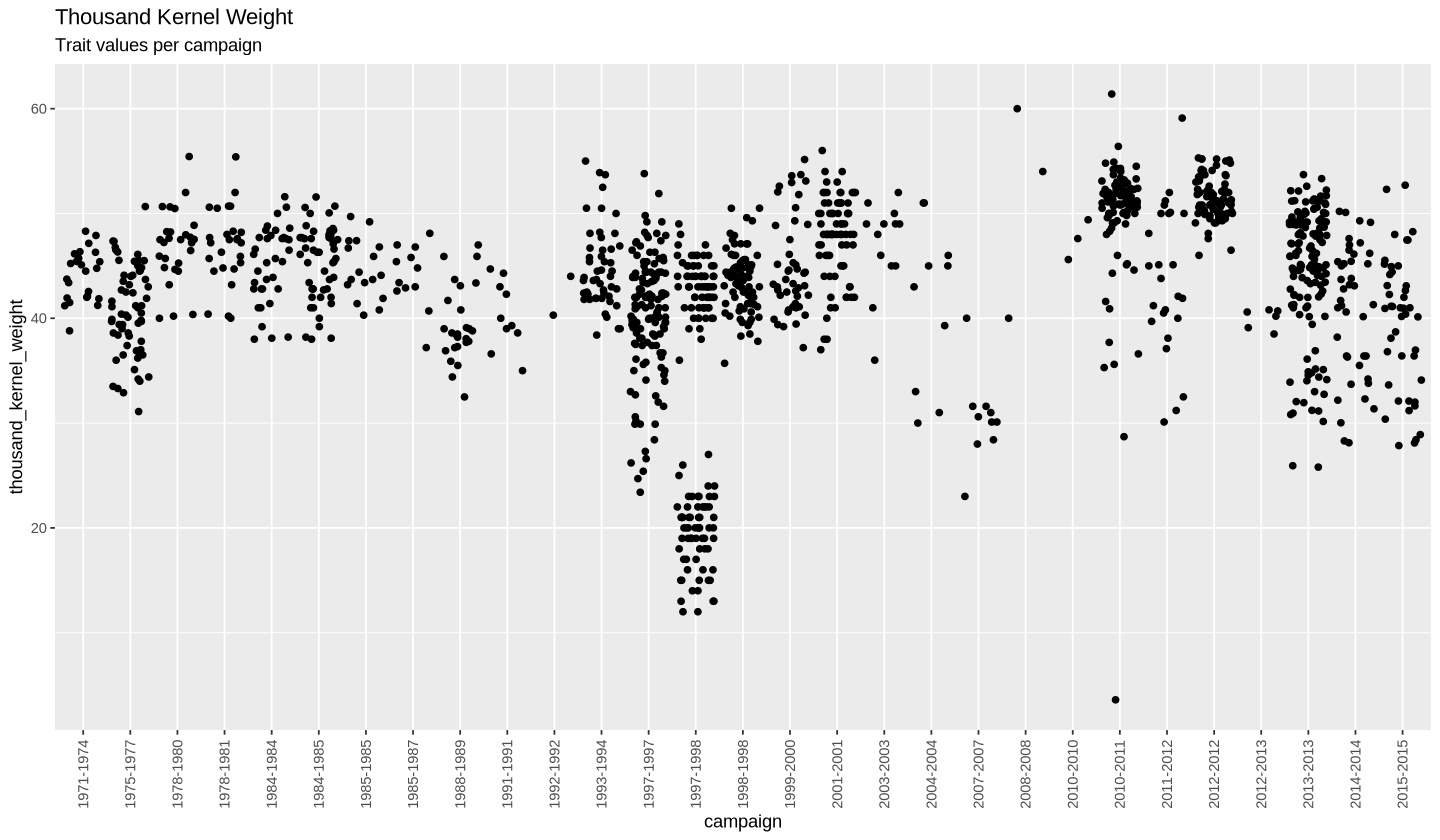

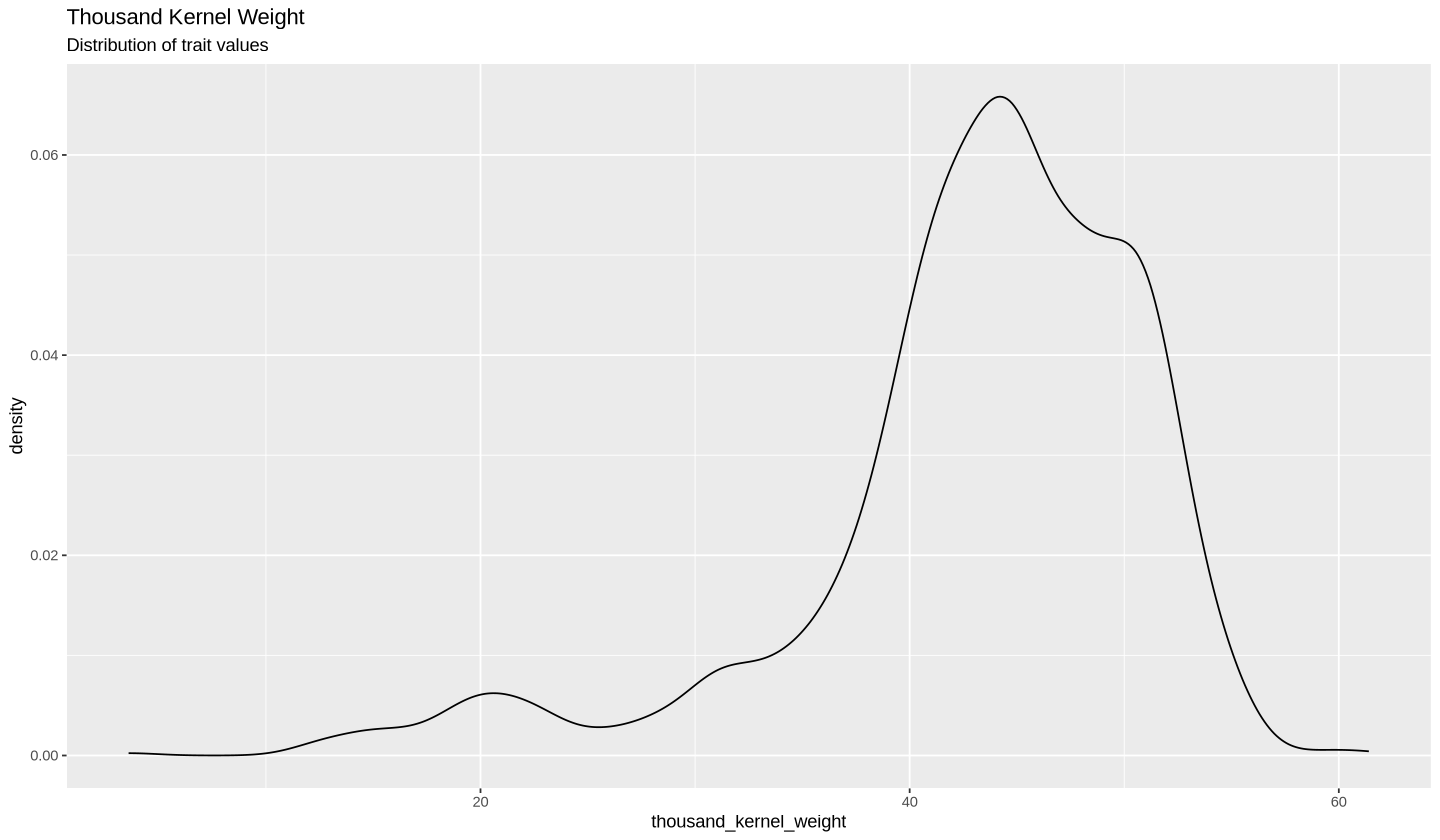

In [7]:
data_sub_SB_HT |> visualise_trait(geom_density())
data_sub_SB_PH |> visualise_trait(geom_density())
data_sub_SB_TKW |> visualise_trait(geom_density())

## Extract and format the campaign effects

In [8]:
asreml_campaign_WB_HT <- asreml(fixed = days_to_heading ~campaign, random = ~accenumb, 
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign),
                             data = data_sub_WB_HT)

Online License checked out Fri Apr 12 14:46:35 2024
Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:35 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1612.355           1.0    562 14:46:35    0.0
 2     -1578.744           1.0    562 14:46:35    0.0
 3     -1550.383           1.0    562 14:46:35    0.0
 4     -1538.982           1.0    562 14:46:35    0.0
 5     -1536.612           1.0    562 14:46:35    0.0
 6     -1536.562           1.0    562 14:46:35    0.0
 7     -1536.561           1.0    562 14:46:35    0.0


In [9]:
asreml_campaign_WB_PH <- asreml(fixed = plant_height ~campaign, random = ~accenumb,
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                             data = data_sub_WB_PH)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:35 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2567.459           1.0   1026 14:46:35    0.0 (1 restrained)
 2     -2484.029           1.0   1026 14:46:35    0.0 (1 restrained)
 3     -2406.428           1.0   1026 14:46:35    0.0 (1 restrained)
 4     -2378.533           1.0   1026 14:46:35    0.0 (1 restrained)
 5     -2370.700           1.0   1026 14:46:35    0.0
 6     -2370.137           1.0   1026 14:46:35    0.0
 7     -2370.112           1.0   1026 14:46:35    0.0
 8     -2370.111           1.0   1026 14:46:35    0.0


In [10]:
asreml_campaign_WB_TKW <- asreml(fixed = thousand_kernel_weight ~campaign, random = ~accenumb,
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                              data = data_sub_WB_TKW)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:35 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2047.153           1.0    995 14:46:35    0.0 (2 restrained)
 2     -1942.227           1.0    995 14:46:35    0.0 (3 restrained)
 3     -1749.214           1.0    995 14:46:35    0.0 (3 restrained)
 4     -1639.901           1.0    995 14:46:35    0.0 (3 restrained)
 5     -1605.064           1.0    995 14:46:35    0.0 (2 restrained)
 6     -1593.078           1.0    995 14:46:35    0.0 (1 restrained)
 7     -1592.035           1.0    995 14:46:35    0.0
 8     -1592.016           1.0    995 14:46:35    0.0
 9     -1592.016           1.0    995 14:46:35    0.0


In [11]:
asreml_campaign_SB_HT <- asreml(fixed = days_to_heading ~campaign, random = ~accenumb, 
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign),
                              data = data_sub_SB_HT)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:35 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1151.768           1.0    512 14:46:35    0.0
 2     -1136.974           1.0    512 14:46:35    0.0
 3     -1123.060           1.0    512 14:46:35    0.0
 4     -1116.374           1.0    512 14:46:35    0.0
 5     -1114.032           1.0    512 14:46:35    0.0
 6     -1113.340           1.0    512 14:46:35    0.0
 7     -1113.034           1.0    512 14:46:35    0.0
 8     -1112.889           1.0    512 14:46:35    0.0
 9     -1112.815           1.0    512 14:46:35    0.0
10     -1112.778           1.0    512 14:46:35    0.0
11     -1112.757           1.0    512 14:46:35    0.0
12     -1112.746           1.0    512 14:46:35    0.0
13     -1112.741           1.0    512 14:46:35    0.0


Warning message in asreml(fixed = days_to_heading ~ campaign, random = ~accenumb, :
“Log-likelihood not converged”
Warning message in asreml(fixed = days_to_heading ~ campaign, random = ~accenumb, :
“Some components changed by more than 1% on the last iteration.”


In [12]:
asreml_campaign_SB_PH <- asreml(fixed = plant_height ~campaign, random = ~accenumb,
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                             data = data_sub_SB_PH)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:36 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -3713.974           1.0   1382 14:46:36    0.0
 2     -3618.409           1.0   1382 14:46:36    0.0
 3     -3499.854           1.0   1382 14:46:36    0.0 (1 restrained)
 4     -3440.407           1.0   1382 14:46:36    0.0
 5     -3401.617           1.0   1382 14:46:36    0.0
 6     -3391.186           1.0   1382 14:46:36    0.0
 7     -3390.153           1.0   1382 14:46:36    0.0
 8     -3390.117           1.0   1382 14:46:36    0.0
 9     -3390.115           1.0   1382 14:46:36    0.0
10     -3390.115           1.0   1382 14:46:36    0.0


In [13]:
asreml_campaign_SB_TKW <- asreml(fixed = thousand_kernel_weight ~campaign, random = ~accenumb,
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                              data = data_sub_SB_TKW)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:36 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2573.031           1.0   1264 14:46:36    0.0 (1 restrained)
 2     -2500.014           1.0   1264 14:46:36    0.0
 3     -2441.333           1.0   1264 14:46:36    0.0
 4     -2415.089           1.0   1264 14:46:36    0.0
 5     -2404.938           1.0   1264 14:46:36    0.0
 6     -2400.512           1.0   1264 14:46:36    0.0
 7     -2392.743           1.0   1264 14:46:36    0.0
 8     -2391.170           1.0   1264 14:46:36    0.0
 9     -2391.021           1.0   1264 14:46:36    0.0
10     -2391.014           1.0   1264 14:46:36    0.0


In [14]:
campaign_effect_WB_HT <- get_campaign_effect(asreml_campaign_WB_HT)
campaign_effect_WB_PH <- get_campaign_effect(asreml_campaign_WB_PH)
campaign_effect_WB_TKW <- get_campaign_effect(asreml_campaign_WB_TKW)

In [15]:
campaign_effect_SB_HT <- get_campaign_effect(asreml_campaign_SB_HT)
campaign_effect_SB_PH <- get_campaign_effect(asreml_campaign_SB_PH)
campaign_effect_SB_TKW <- get_campaign_effect(asreml_campaign_SB_TKW)

## Extract heterogeneous error variances

In [16]:
error_var_WB_HT <- get_error_var(asreml_campaign_WB_HT)
error_var_WB_PH <- get_error_var(asreml_campaign_WB_PH)
error_var_WB_TKW <- get_error_var(asreml_campaign_WB_TKW)

In [17]:
error_var_SB_HT <- get_error_var(asreml_campaign_SB_HT)
error_var_SB_PH <- get_error_var(asreml_campaign_SB_PH)
error_var_SB_TKW <- get_error_var(asreml_campaign_SB_TKW)

## Calculate and standardize the coefficient of variation (CV)

In [18]:
CV_df_WB_HT <- make_CV_df(campaign_effect_WB_HT, error_var_WB_HT)
CV_df_WB_PH <- make_CV_df(campaign_effect_WB_PH, error_var_WB_PH)
CV_df_WB_TKW <- make_CV_df(campaign_effect_WB_TKW, error_var_WB_TKW)

In [19]:
CV_df_SB_HT <- make_CV_df(campaign_effect_SB_HT, error_var_SB_HT)
CV_df_SB_PH <- make_CV_df(campaign_effect_SB_PH, error_var_SB_PH)
CV_df_SB_TKW <- make_CV_df(campaign_effect_SB_TKW, error_var_SB_TKW)

## Remove outlier campaigns

In [20]:
data_corrected_WB_HT_I <- data_sub_WB_HT |> correct_I(CV_df_WB_HT)
data_corrected_WB_PH_I <- data_sub_WB_PH |> correct_I(CV_df_WB_PH)
data_corrected_WB_TKW_I <- data_sub_WB_TKW |> correct_I(CV_df_WB_TKW)

0 outlier campaign(s) detected for trait days_to_heading
0 outlier campaign(s) detected for trait plant_height
0 outlier campaign(s) detected for trait thousand_kernel_weight


In [21]:
data_corrected_SB_HT_I <- data_sub_SB_HT |> correct_I(CV_df_SB_HT)
data_corrected_SB_PH_I <- data_sub_SB_PH |> correct_I(CV_df_SB_PH)
data_corrected_SB_TKW_I <- data_sub_SB_TKW |> correct_I(CV_df_SB_TKW)

0 outlier campaign(s) detected for trait days_to_heading
1 outlier campaign(s) detected for trait plant_height: 2012-2013 
1 outlier campaign(s) detected for trait thousand_kernel_weight: 2008-2008 


## Residuals

In [22]:
asreml_res_WB_HT <- asreml(fixed = days_to_heading ~ accenumb, random = ~ campaign,
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_WB_HT_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:36 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1737.420           1.0    404 14:46:36    0.0
 2     -1592.669           1.0    404 14:46:36    0.0
 3     -1429.407           1.0    404 14:46:36    0.0 (1 restrained)
 4     -1307.663           1.0    404 14:46:36    0.0 (1 restrained)
 5     -1229.603           1.0    404 14:46:36    0.0 (1 restrained)
 6     -1193.250           1.0    404 14:46:36    0.0 (1 restrained)
 7     -1176.829           1.0    404 14:46:36    0.0
 8     -1169.493           1.0    404 14:46:36    0.0
 9     -1166.209           1.0    404 14:46:36    0.0
10     -1164.842           1.0    404 14:46:36    0.0
11     -1164.373           1.0    404 14:46:36    0.0
12     -1164.267           1.0    404 14:46:36    0.0
13     -1164.256           1.0    404 14:46:36    0.0


Warning message in asreml(fixed = days_to_heading ~ accenumb, random = ~campaign, :
“Log-likelihood not converged”
Warning message in asreml(fixed = days_to_heading ~ accenumb, random = ~campaign, :
“Some components changed by more than 1% on the last iteration.”


In [23]:
asreml_res_WB_PH <- asreml(fixed = plant_height ~ accenumb, random = ~ campaign, 
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_WB_PH_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:36 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2021.055           1.0    788 14:46:36    0.0 (2 restrained)
 2     -1867.060           1.0    788 14:46:36    0.0
 3     -1821.658           1.0    788 14:46:36    0.0
 4     -1794.304           1.0    788 14:46:36    0.0
 5     -1781.399           1.0    788 14:46:36    0.0
 6     -1777.523           1.0    788 14:46:36    0.0
 7     -1776.500           1.0    788 14:46:36    0.0
 8     -1776.257           1.0    788 14:46:36    0.0 (1 restrained)
 9     -1775.670           1.0    788 14:46:36    0.0 (1 restrained)
10     -1775.441           1.0    788 14:46:37    0.0 (1 restrained)
11     -1775.417           1.0    788 14:46:37    0.0 (1 restrained)
12     -1775.416           1.0    788 14:46:37    0.0 (1 restrained)
13     -1775.416           1.0    788 14:46:37    0.0


Warning message in asreml(fixed = plant_height ~ accenumb, random = ~campaign, na.action = na.method(x = "omit", :
“Log-likelihood not converged”


In [24]:
asreml_res_WB_TKW <- asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~ campaign, 
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_WB_TKW_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:37 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1363.081           1.0    763 14:46:37    0.0 (5 restrained)
 2     -1158.399           1.0    763 14:46:37    0.0 (2 restrained)
 3     -1119.110           1.0    763 14:46:37    0.0 (2 restrained)
 4     -1097.403           1.0    763 14:46:37    0.0 (2 restrained)
 5     -1084.692           1.0    763 14:46:37    0.0 (1 restrained)
 6     -1080.432           1.0    763 14:46:37    0.0
 7     -1079.149           1.0    763 14:46:37    0.0 (1 restrained)
 8     -1078.538           1.0    763 14:46:37    0.0 (1 restrained)
 9     -1078.405           1.0    763 14:46:37    0.0 (1 restrained)
10     -1078.397           1.0    763 14:46:37    0.0 (1 restrained)
11     -1078.396           1.0    763 14:46:37    0.0 (1 restrained)


Warning message in asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~campaign, :
“Some components changed by more than 1% on the last iteration.”


In [25]:
asreml_res_SB_HT <- asreml(fixed = days_to_heading ~ accenumb, random = ~ campaign,
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_SB_HT_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:37 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -932.205           1.0    361 14:46:37    0.0
 2      -876.215           1.0    361 14:46:37    0.0
 3      -835.486           1.0    361 14:46:37    0.0
 4      -808.068           1.0    361 14:46:37    0.0
 5      -792.498           1.0    361 14:46:37    0.0
 6      -786.626           1.0    361 14:46:37    0.0
 7      -784.730           1.0    361 14:46:37    0.0
 8      -784.339           1.0    361 14:46:37    0.0
 9      -784.309           1.0    361 14:46:37    0.0
10      -784.309           1.0    361 14:46:37    0.0
11      -784.308           1.0    361 14:46:37    0.0
12      -784.308           1.0    361 14:46:37    0.0


In [26]:
asreml_res_SB_PH <- asreml(fixed = plant_height ~ accenumb, random = ~ campaign, 
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_SB_PH_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:37 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2675.774           1.0   1048 14:46:37    0.0 (4 restrained)
 2     -2560.398           1.0   1048 14:46:37    0.0
 3     -2509.648           1.0   1048 14:46:37    0.0
 4     -2490.433           1.0   1048 14:46:37    0.0
 5     -2483.411           1.0   1048 14:46:37    0.0
 6     -2482.332           1.0   1048 14:46:37    0.0
 7     -2482.245           1.0   1048 14:46:37    0.0
 8     -2482.243           1.0   1048 14:46:37    0.0
 9     -2482.243           1.0   1048 14:46:37    0.0


In [27]:
asreml_res_SB_TKW <- asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~ campaign, 
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_SB_TKW_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:37 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1881.750           1.0    942 14:46:37    0.0 (3 restrained)
 2     -1804.017           1.0    942 14:46:37    0.0
 3     -1767.874           1.0    942 14:46:38    0.0 (1 restrained)
 4     -1761.208           1.0    942 14:46:38    0.0
 5     -1740.952           1.0    942 14:46:38    0.0
 6     -1735.293           1.0    942 14:46:38    0.0
 7     -1734.193           1.0    942 14:46:38    0.0
 8     -1734.084           1.0    942 14:46:38    0.0
 9     -1734.080           1.0    942 14:46:38    0.0


15 outlier value(s) detected for trait Days To Heading 
108 outlier value(s) detected for trait Plant Height 


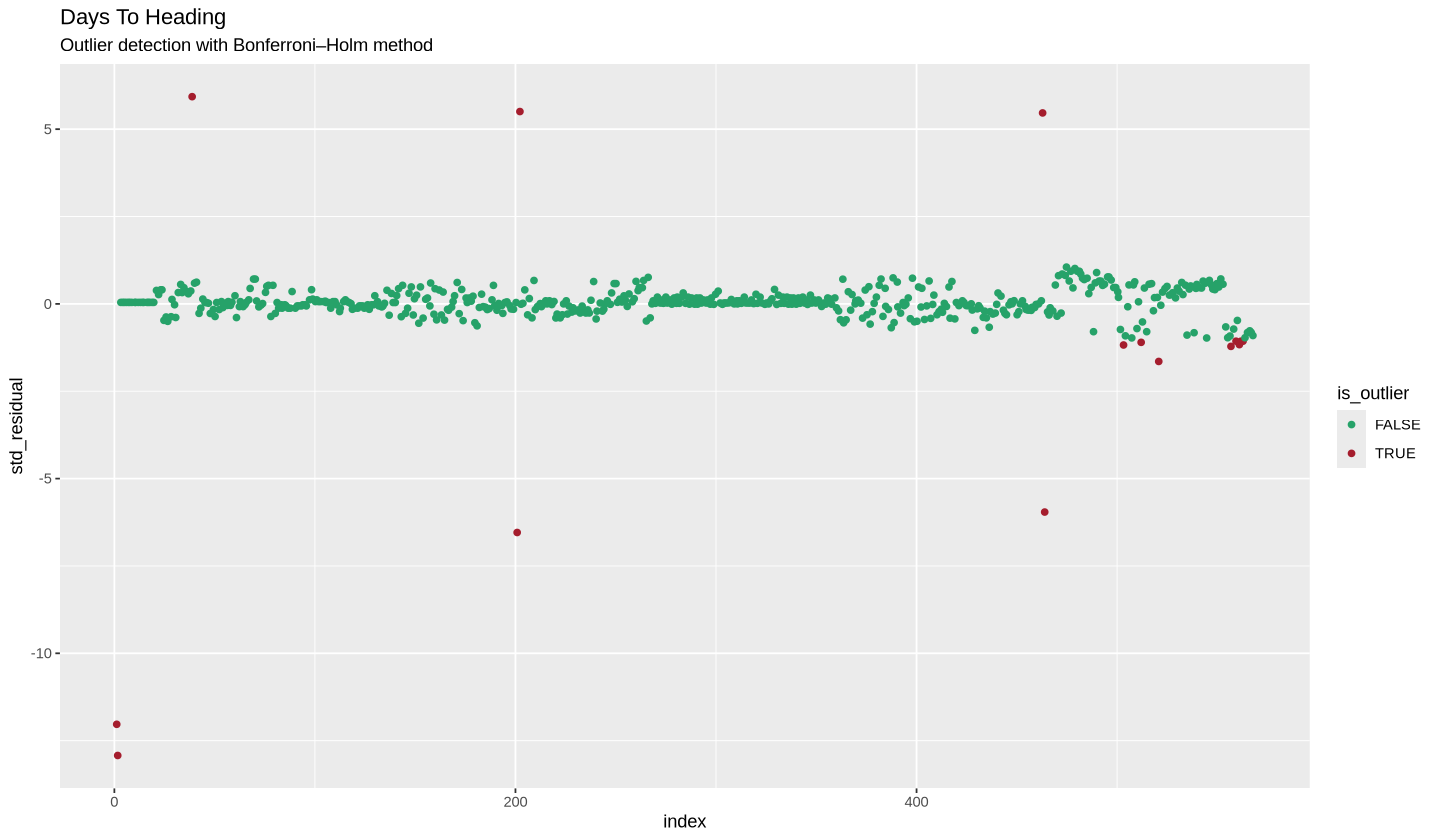

69 outlier value(s) detected for trait Thousand Kernel Weight 


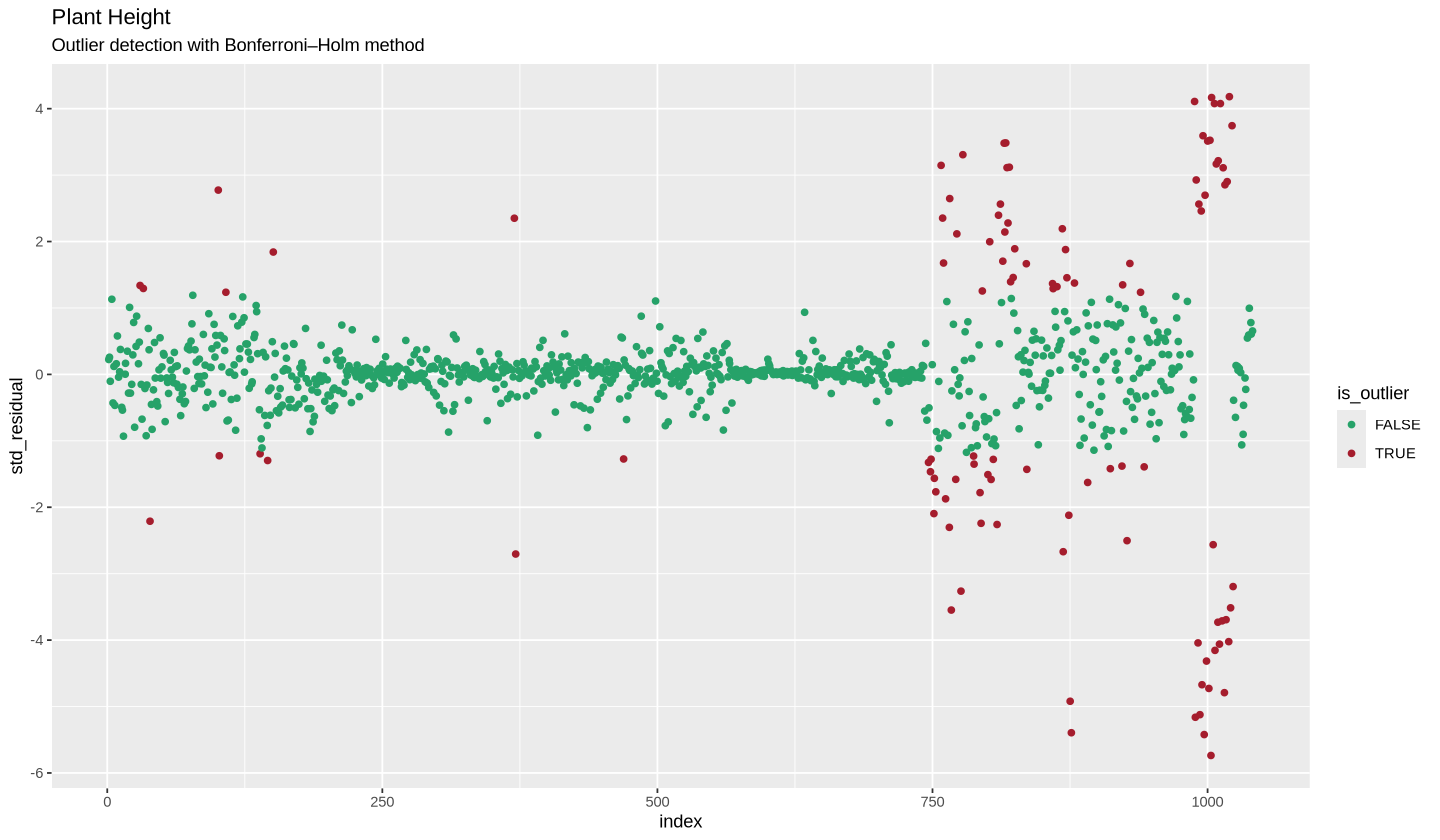

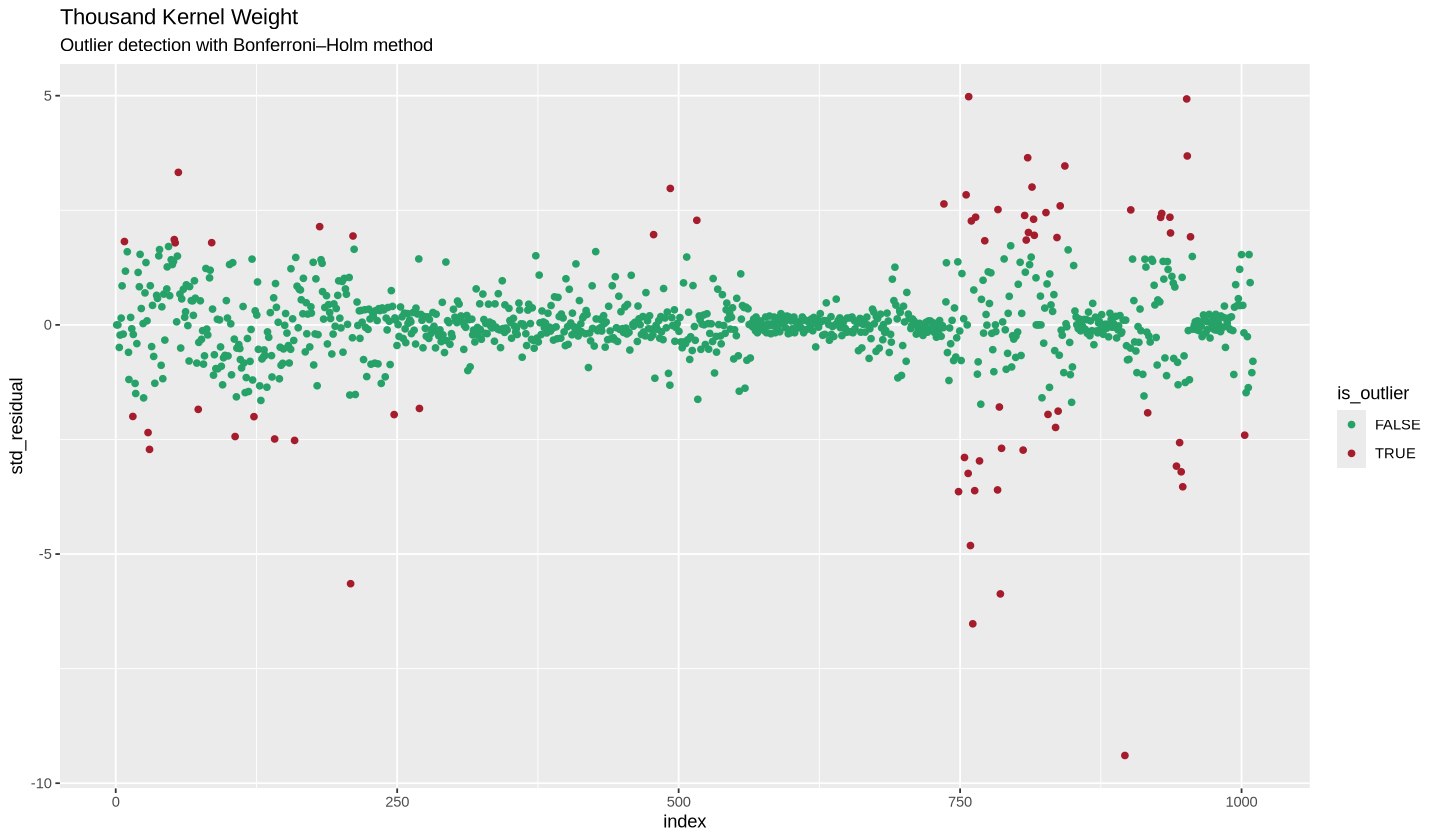

In [28]:
result_BH_WB_HT <- make_BH_multtest(asreml_res_WB_HT)
result_BH_WB_PH <- make_BH_multtest(asreml_res_WB_PH)
result_BH_WB_TKW <- make_BH_multtest(asreml_res_WB_TKW)

1 outlier value(s) detected for trait Days To Heading 
22 outlier value(s) detected for trait Plant Height 


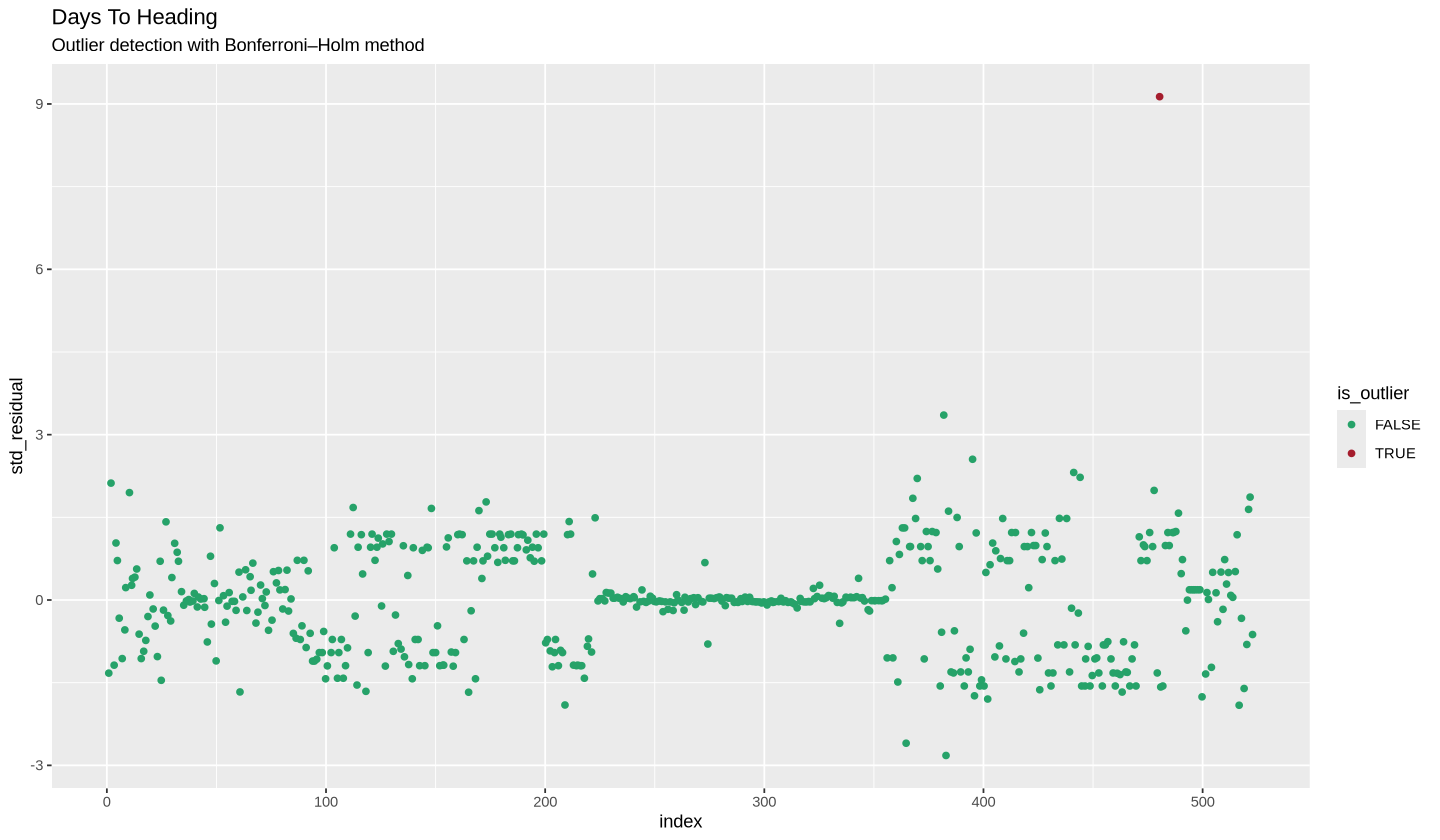

125 outlier value(s) detected for trait Thousand Kernel Weight 


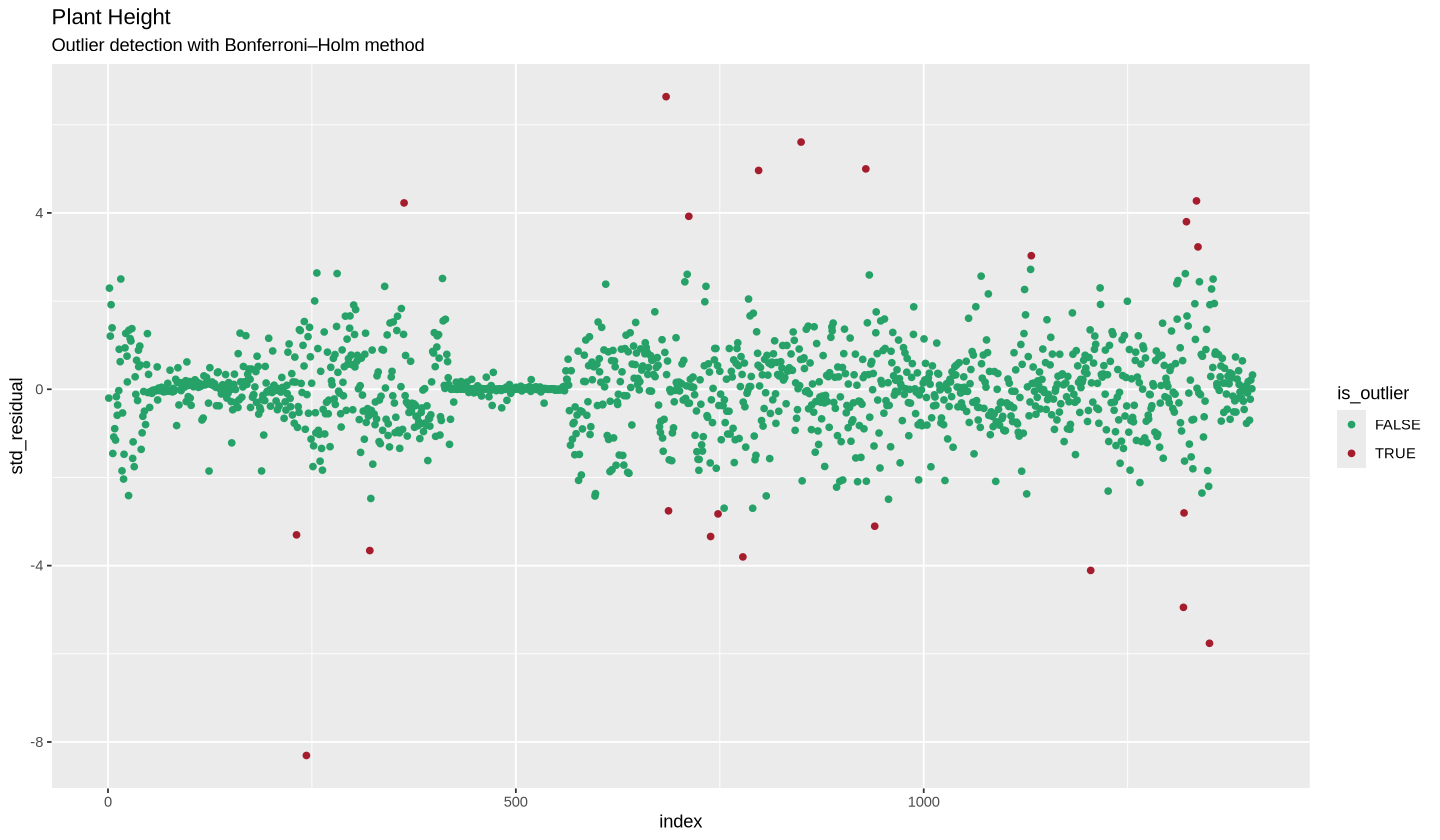

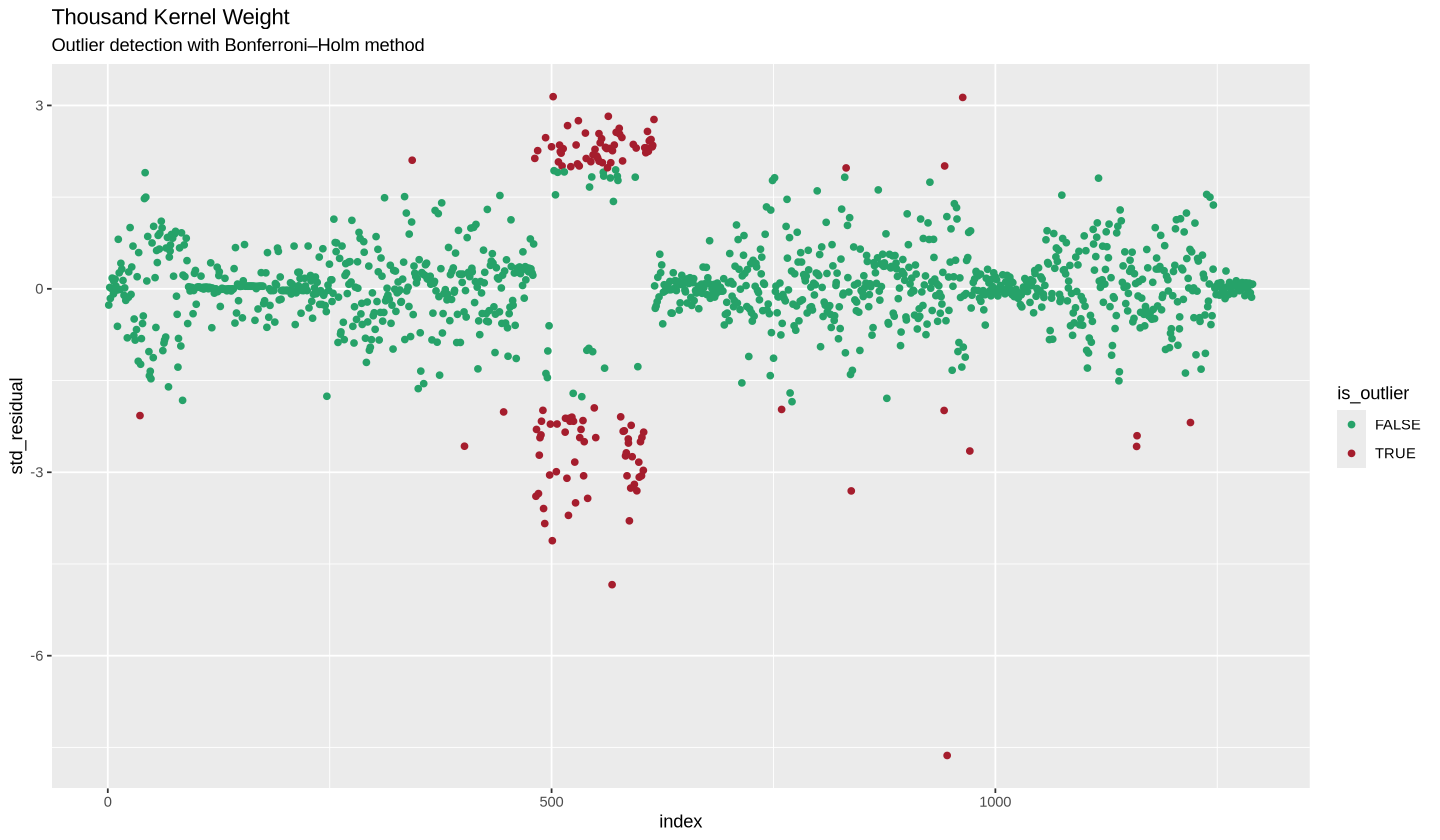

In [29]:
result_BH_SB_HT <- make_BH_multtest(asreml_res_SB_HT)
result_BH_SB_PH <- make_BH_multtest(asreml_res_SB_PH)
result_BH_SB_TKW <- make_BH_multtest(asreml_res_SB_TKW)

In [30]:
data_corrected_WB_HT_II <- data_corrected_WB_HT_I |> correct_II(result_BH_WB_HT)
data_corrected_WB_PH_II <- data_corrected_WB_PH_I |> correct_II(result_BH_WB_PH)
data_corrected_WB_TKW_II <- data_corrected_WB_TKW_I |> correct_II(result_BH_WB_TKW)

In [31]:
data_corrected_SB_HT_II <- data_corrected_SB_HT_I |> correct_II(result_BH_SB_HT)
data_corrected_SB_PH_II <- data_corrected_SB_PH_I |> correct_II(result_BH_SB_PH)
data_corrected_SB_TKW_II <- data_corrected_SB_TKW_I |> correct_II(result_BH_SB_TKW)

## Calculate heritability

In [32]:
asreml_res_h_WB_HT <- asreml(days_to_heading ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_WB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:40 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1228.771           1.0    546 14:46:40    0.0
 2     -1203.729           1.0    546 14:46:40    0.0
 3     -1177.067           1.0    546 14:46:40    0.0
 4     -1156.824           1.0    546 14:46:40    0.0
 5     -1140.875           1.0    546 14:46:40    0.0
 6     -1135.705           1.0    546 14:46:40    0.0
 7     -1134.857           1.0    546 14:46:40    0.0
 8     -1134.782           1.0    546 14:46:40    0.0
 9     -1134.778           1.0    546 14:46:40    0.0


In [33]:
asreml_res_h_WB_PH <- asreml(plant_height ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_WB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:40 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2496.964           1.0    927 14:46:40    0.0 (1 restrained)
 2     -2318.610           1.0    927 14:46:40    0.0 (1 restrained)
 3     -2086.909           1.0    927 14:46:40    0.0 (2 restrained)
 4     -1970.816           1.0    927 14:46:40    0.0 (2 restrained)
 5     -1909.449           1.0    927 14:46:40    0.0 (1 restrained)
 6     -1889.524           1.0    927 14:46:40    0.0 (1 restrained)
 7     -1882.425           1.0    927 14:46:40    0.0
 8     -1879.771           1.0    927 14:46:40    0.0
 9     -1879.071           1.0    927 14:46:40    0.0
10     -1878.976           1.0    927 14:46:40    0.0
11     -1878.972           1.0    927 14:46:40    0.0


In [34]:
asreml_res_h_WB_TKW <- asreml(thousand_kernel_weight ~1, random = ~accenumb + campaign, 
                    na.action = na.method(x="omit", y="omit"),
                    residual = ~dsum( ~id(units) | campaign), data = data_corrected_WB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:40 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1900.257           1.0    935 14:46:40    0.0
 2     -1747.054           1.0    935 14:46:40    0.0 (3 restrained)
Log-likelihood decreased to  -1850.56 ; trying with reduced updates (0.542024)
 3     -1720.198           1.0    935 14:46:40    0.0
 4     -1663.968           1.0    935 14:46:40    0.0
 5     -1496.739           1.0    935 14:46:40    0.0 (1 restrained)
 6     -1369.914           1.0    935 14:46:40    0.0 (1 restrained)
 7     -1316.930           1.0    935 14:46:40    0.0 (1 restrained)
 8     -1294.460           1.0    935 14:46:40    0.0
 9     -1290.769           1.0    935 14:46:40    0.0 (1 restrained)
10     -1289.759           1.0    935 14:46:40    0.0 (1 restrained)
11     -1289.499           1.0    935 14:46:40    0.0 (1 restrained)
12     -1289.473           1.0    935 14:46:40    0.0 (1 restrained)
13     

Warning message in asreml(thousand_kernel_weight ~ 1, random = ~accenumb + campaign, :
“Log-likelihood not converged”
Warning message in asreml(thousand_kernel_weight ~ 1, random = ~accenumb + campaign, :
“Some components changed by more than 1% on the last iteration.”


In [35]:
asreml_res_h_SB_HT <- asreml(days_to_heading ~1, random = ~accenumb + campaign, 
                    na.action = na.method(x="omit", y="omit"), 
                    residual = ~dsum( ~id(units) | campaign), data = data_corrected_SB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:40 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1227.082           1.0    520 14:46:40    0.0
 2     -1186.337           1.0    520 14:46:40    0.0
 3     -1141.854           1.0    520 14:46:40    0.0
 4     -1110.928           1.0    520 14:46:40    0.0
 5     -1092.331           1.0    520 14:46:40    0.0
 6     -1084.353           1.0    520 14:46:40    0.0
 7     -1081.525           1.0    520 14:46:40    0.0
 8     -1080.875           1.0    520 14:46:40    0.0
 9     -1080.796           1.0    520 14:46:40    0.0
10     -1080.789           1.0    520 14:46:40    0.0
11     -1080.788           1.0    520 14:46:40    0.0


In [36]:
asreml_res_h_SB_PH <- asreml(plant_height ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_SB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:40 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -3634.711           1.0   1373 14:46:40    0.0
 2     -3511.632           1.0   1373 14:46:40    0.0
 3     -3362.196           1.0   1373 14:46:40    0.0 (1 restrained)
 4     -3264.396           1.0   1373 14:46:40    0.0
 5     -3219.656           1.0   1373 14:46:40    0.0
 6     -3211.215           1.0   1373 14:46:40    0.0
 7     -3210.838           1.0   1373 14:46:40    0.0
 8     -3210.827           1.0   1373 14:46:40    0.0
 9     -3210.825           1.0   1373 14:46:40    0.0
10     -3210.825           1.0   1373 14:46:40    0.0
11     -3210.824           1.0   1373 14:46:40    0.0
12     -3210.824           1.0   1373 14:46:40    0.0


In [37]:
asreml_res_h_SB_TKW <- asreml(thousand_kernel_weight ~1, random = ~accenumb + campaign, 
                     na.action = na.method(x="omit", y="omit"),
                     residual = ~dsum( ~id(units) | campaign), data = data_corrected_SB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:40 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2181.902           1.0   1121 14:46:40    0.0 (1 restrained)
 2     -2092.537           1.0   1121 14:46:40    0.0
 3     -1997.165           1.0   1121 14:46:40    0.0
 4     -1940.815           1.0   1121 14:46:40    0.0 (1 restrained)
 5     -1913.046           1.0   1121 14:46:40    0.0
 6     -1900.803           1.0   1121 14:46:40    0.0
 7     -1898.407           1.0   1121 14:46:40    0.0
 8     -1898.091           1.0   1121 14:46:40    0.0
 9     -1898.072           1.0   1121 14:46:40    0.0
10     -1898.071           1.0   1121 14:46:40    0.0


In [38]:
quality_WB_HT <- get_quality(data_sub_WB_HT, asreml_res_h_WB_HT)
quality_WB_PH <- get_quality(data_sub_WB_PH, asreml_res_h_WB_PH)
quality_WB_TKW <- get_quality(data_sub_WB_TKW, asreml_res_h_WB_TKW)
quality_WB_all <- bind_rows(quality_WB_HT, quality_WB_PH, quality_WB_TKW) |> mutate(across(-1, \(x) round(x, 3)))
write_csv(quality_WB_all,"NPPC_winter_barley_data_quality.csv")

days_to_heading heritability: 76.2 %
plant_height heritability: 91 %
thousand_kernel_weight heritability: 97.5 %


In [39]:
quality_SB_HT <- get_quality(data_sub_SB_HT, asreml_res_h_SB_HT)
quality_SB_PH <- get_quality(data_sub_SB_PH, asreml_res_h_SB_PH)
quality_SB_TKW <- get_quality(data_sub_SB_TKW, asreml_res_h_SB_TKW)
quality_SB_all <- bind_rows(quality_SB_HT, quality_SB_PH, quality_SB_TKW) |> mutate(across(-1, \(x) round(x, 3)))
write_csv(quality_SB_all,"NPPC_spring_barley_data_quality.csv")

days_to_heading heritability: 81.9 %
plant_height heritability: 91.8 %
thousand_kernel_weight heritability: 87.4 %


## Run linear mixed model with outlier corrected data

In [40]:
asreml_data_WB_HT <- asreml(days_to_heading ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_WB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:41 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -857.727           1.0    390 14:46:41    0.0
 2      -837.699           1.0    390 14:46:41    0.0
 3      -816.658           1.0    390 14:46:41    0.0
 4      -806.698           1.0    390 14:46:41    0.0
 5      -803.536           1.0    390 14:46:41    0.0
 6      -803.280           1.0    390 14:46:41    0.0
 7      -803.276           1.0    390 14:46:41    0.0


In [41]:
asreml_data_WB_PH <- asreml(plant_height ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_WB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:41 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1529.972           1.0    680 14:46:41    0.0 (3 restrained)
 2     -1399.481           1.0    680 14:46:41    0.0 (2 restrained)
 3     -1319.989           1.0    680 14:46:41    0.0 (1 restrained)
 4     -1267.161           1.0    680 14:46:41    0.0 (1 restrained)
 5     -1243.964           1.0    680 14:46:41    0.0 (1 restrained)
 6     -1237.688           1.0    680 14:46:41    0.0
 7     -1236.017           1.0    680 14:46:41    0.0
 8     -1235.716           1.0    680 14:46:41    0.0
 9     -1235.680           1.0    680 14:46:41    0.0
10     -1235.670           1.0    680 14:46:41    0.0
11     -1235.661           1.0    680 14:46:41    0.0
12     -1235.654           1.0    680 14:46:41    0.0
13     -1235.639           1.0    680 14:46:41    0.0


Warning message in asreml(plant_height ~ accenumb, random = ~campaign, na.action = na.method(x = "omit", :
“Log-likelihood not converged”
Warning message in asreml(plant_height ~ accenumb, random = ~campaign, na.action = na.method(x = "omit", :
“Some components changed by more than 1% on the last iteration.”


In [42]:
asreml_data_WB_TKW <- asreml(thousand_kernel_weight ~accenumb, random = ~campaign, 
                           na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                           data = data_corrected_WB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:41 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1144.230           1.0    693 14:46:41    0.0 (3 restrained)
 2      -855.995           1.0    693 14:46:41    0.0
 3      -804.176           1.0    693 14:46:41    0.0
 4      -771.097           1.0    693 14:46:41    0.0
 5      -757.306           1.0    693 14:46:41    0.0 (1 restrained)
 6      -753.785           1.0    693 14:46:41    0.0 (1 restrained)
 7      -752.825           1.0    693 14:46:41    0.0 (2 restrained)
 8      -752.009           1.0    693 14:46:41    0.0 (1 restrained)
 9      -751.801           1.0    693 14:46:41    0.0 (1 restrained)
10      -751.785           1.0    693 14:46:41    0.0 (1 restrained)
11      -751.784           1.0    693 14:46:41    0.0 (1 restrained)


Warning message in asreml(thousand_kernel_weight ~ accenumb, random = ~campaign, :
“Some components changed by more than 1% on the last iteration.”


In [43]:
asreml_data_SB_HT <- asreml(days_to_heading ~accenumb, random = ~campaign, 
                          na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                          data = data_corrected_SB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:41 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -902.649           1.0    360 14:46:41    0.0
 2      -854.016           1.0    360 14:46:41    0.0
 3      -812.965           1.0    360 14:46:41    0.0
 4      -784.777           1.0    360 14:46:41    0.0
 5      -768.492           1.0    360 14:46:41    0.0
 6      -762.153           1.0    360 14:46:41    0.0
 7      -760.075           1.0    360 14:46:41    0.0
 8      -759.626           1.0    360 14:46:41    0.0
 9      -759.588           1.0    360 14:46:41    0.0
10      -759.588           1.0    360 14:46:41    0.0


In [44]:
asreml_data_SB_PH <- asreml(plant_height ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_SB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:41 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -2503.115           1.0   1026 14:46:41    0.0 (4 restrained)
 2     -2366.076           1.0   1026 14:46:41    0.0
 3     -2317.416           1.0   1026 14:46:41    0.0
 4     -2301.397           1.0   1026 14:46:41    0.0
 5     -2295.536           1.0   1026 14:46:41    0.0
 6     -2294.667           1.0   1026 14:46:41    0.0
 7     -2294.613           1.0   1026 14:46:41    0.0
 8     -2294.613           1.0   1026 14:46:41    0.0


In [45]:
asreml_data_SB_TKW <- asreml(thousand_kernel_weight ~accenumb, random = ~campaign, 
                           na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                           data = data_corrected_SB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Fri Apr 12 14:46:42 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1452.104           1.0    818 14:46:42    0.0 (3 restrained)
 2     -1350.931           1.0    818 14:46:42    0.0
 3     -1309.256           1.0    818 14:46:42    0.0
 4     -1288.108           1.0    818 14:46:42    0.0
 5     -1278.858           1.0    818 14:46:42    0.0
 6     -1276.960           1.0    818 14:46:42    0.0
 7     -1276.741           1.0    818 14:46:42    0.0
 8     -1276.730           1.0    818 14:46:42    0.0
 9     -1276.730           1.0    818 14:46:42    0.0


## Extract BLUEs and create output file

In [46]:
BLUEs_WB_HT <- get_BLUEs(asreml_data_WB_HT)
BLUEs_WB_PH <- get_BLUEs(asreml_data_WB_PH)
BLUEs_WB_TKW <- get_BLUEs(asreml_data_WB_TKW)

BLUE_WB_all <- genotypes_w |> 
                        left_join(BLUEs_WB_HT, by="genotype") |> 
                        left_join(BLUEs_WB_PH, by="genotype") |> 
                        left_join(BLUEs_WB_TKW, by="genotype") |> 
                        arrange(genotype) |> mutate(across(-1, \(x) round(x, 2)))

write_csv(BLUE_WB_all,"NPPC_winter_barley_BLUE_values.csv")
summary(BLUE_WB_all)

   genotype         days_to_heading_BLUE plant_height_BLUE
 Length:520         Min.   :212.6        Min.   : 30.10   
 Class :character   1st Qu.:218.1        1st Qu.: 92.59   
 Mode  :character   Median :223.7        Median : 96.90   
                    Mean   :223.3        Mean   : 96.56   
                    3rd Qu.:227.9        3rd Qu.:101.28   
                    Max.   :234.8        Max.   :130.01   
                    NA's   :363          NA's   :272      
 thousand_kernel_weight_BLUE
 Min.   :38.41              
 1st Qu.:45.72              
 Median :48.44              
 Mean   :49.91              
 3rd Qu.:53.81              
 Max.   :67.31              
 NA's   :277                

In [47]:
BLUEs_SB_HT <- get_BLUEs(asreml_data_SB_HT)
BLUEs_SB_PH <- get_BLUEs(asreml_data_SB_PH)
BLUEs_SB_TKW <- get_BLUEs(asreml_data_SB_TKW)


BLUE_SB_all <- genotypes_s |> 
                        left_join(BLUEs_SB_HT, by="genotype") |> 
                        left_join(BLUEs_SB_PH, by="genotype") |> 
                        left_join(BLUEs_SB_TKW, by="genotype") |> 
                        arrange(genotype) |> mutate(across(-1, \(x) round(x, 2)))

write_csv(BLUE_SB_all,"NPPC_spring_barley_BLUE_values.csv")
summary(BLUE_SB_all)

   genotype         days_to_heading_BLUE plant_height_BLUE
 Length:1053        Min.   :61.82        Min.   : 51.05   
 Class :character   1st Qu.:70.73        1st Qu.: 73.72   
 Mode  :character   Median :73.91        Median : 79.22   
                    Mean   :73.87        Mean   : 79.69   
                    3rd Qu.:76.78        3rd Qu.: 84.73   
                    Max.   :84.02        Max.   :106.57   
                    NA's   :892          NA's   :705      
 thousand_kernel_weight_BLUE
 Min.   :26.23              
 1st Qu.:41.33              
 Median :44.45              
 Mean   :43.79              
 3rd Qu.:46.76              
 Max.   :55.74              
 NA's   :749                

In [48]:
library(rmarkdown)
convert_ipynb("NPPC_historic_barley_data_analysis.ipynb")

In [49]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Fedora Linux 40.20240411.n.0 (Silverblue)

Matrix products: default
BLAS/LAPACK: /var/home/erwan/.conda/envs/R/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] rmarkdown_2.26      asreml_4.1.0.154    Matrix_1.6-5       
 [4] multtest_2.58.0     Biobase_2.62.0      BiocGenerics_0.48.1
 [7] lubridate_1.9.3     forcats_1.0.0       stringr_1.5.1      
[10] dplyr_1.1.4         purrr_1.0.2         readr_2.1.5        
[13] t